In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv('train.csv')

In [145]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [147]:
df = df.select_dtypes('number')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_duration_in_current_job_level      11153 non-null  float64
 1   job_duration_in_current_person_level   11153 non-null  float64
 2   job_duration_in_current_branch         11153 non-null  float64
 3   gender                                 11153 non-null  int64  
 4   age                                    11153 non-null  int64  
 5   number_of_dependences                  11153 non-null  int64  
 6   GPA                                    11153 non-null  float64
 7   year_graduated                         11153 non-null  int64  
 8   job_duration_from_training             11153 non-null  int64  
 9   branch_rotation                        11153 non-null  int64  
 10  job_rotation                           11153 non-null  int64  
 11  as

In [148]:
df = df.rename(columns = {'Best Performance': 'label'})
df['label'].value_counts()

0    9516
1    1637
Name: label, dtype: int64

In [149]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df.columns)
HR_col.remove('label')
for col in HR_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['label'] = pd.to_numeric(df['label'], downcast='float')
df.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,label
0,2.286607,2.391391,3.234231,5.0,3.235294,0.714286,0.037831,3.918919,0.294118,0.238095,0.714286,0.344828,0.714286,0.000000,1.667862,0.0,0.0
1,2.184360,2.284458,1.940539,5.0,3.823529,0.000000,0.096296,3.378378,0.294118,0.714286,0.714286,0.000000,0.000000,0.064935,1.720057,0.0,0.0
2,4.335897,4.081207,3.324605,0.0,1.029412,0.714286,0.000000,0.945946,3.823529,2.142857,2.857143,1.034483,0.476190,0.064935,1.443143,0.0,0.0
3,4.780914,1.767767,2.587385,5.0,0.588235,1.428571,0.000000,0.675676,3.970588,2.380952,1.785714,0.000000,0.952381,0.649351,1.709698,0.0,1.0
4,4.780914,5.000000,1.320369,5.0,0.294118,2.142857,0.095238,0.405405,4.117647,1.904762,2.500000,0.344828,0.714286,0.000000,1.700135,0.0,0.0


In [150]:
# Set random seed to ensure reproducible runs
RSEED = 20

In [151]:
from sklearn.model_selection import train_test_split

# Extract the labels
labels = np.array(df.pop('label'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df, labels, 
                                                          stratify = labels,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

In [152]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Features for feature importances
features = list(train.columns)

In [153]:
train.shape

(7807, 16)

In [154]:
test.shape

(3346, 16)

In [155]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=20,
                       verbose=1)

In [156]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 2312
Average maximum depth 32


In [157]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [33]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [158]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.0 Train: 1.0
Precision Baseline: 0.15 Test: 0.33 Train: 1.0
Roc Baseline: 0.5 Test: 0.58 Train: 1.0


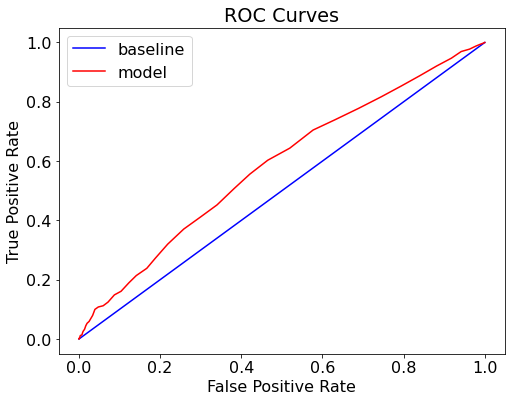

In [159]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [38]:
from sklearn.metrics import confusion_matrix

In [160]:
cm = confusion_matrix(test_labels, rf_predictions)
cm

array([[2853,    2],
       [ 490,    1]], dtype=int64)

In [161]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(20)

,feature,importance
14,Last_achievement_%,0.151398
6,GPA,0.107463
4,age,0.075892
12,annual leave,0.073807
2,job_duration_in_current_branch,0.073631
7,year_graduated,0.071783
0,job_duration_in_current_job_level,0.066973
1,job_duration_in_current_person_level,0.066051
8,job_duration_from_training,0.052101
9,branch_rotation,0.048875


In [162]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(train, train_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.2s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=20),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                     

In [163]:
rs.best_params_

{'n_estimators': 184,
 'min_samples_split': 2,
 'max_leaf_nodes': 39,
 'max_features': 0.7999999999999999,
 'max_depth': 10,
 'bootstrap': True}

## Use best model

In [164]:
best_model = rs.best_estimator_

In [165]:
train_rf_predictions = best_model.predict(train)
train_rf_probs = best_model.predict_proba(train)[:, 1]

rf_predictions = best_model.predict(test)
rf_probs = best_model.predict_proba(test)[:, 1]

In [166]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 77
Average maximum depth 9


Recall Baseline: 1.0 Test: 0.0 Train: 0.01
Precision Baseline: 0.15 Test: 0.5 Train: 1.0
Roc Baseline: 0.5 Test: 0.6 Train: 0.77


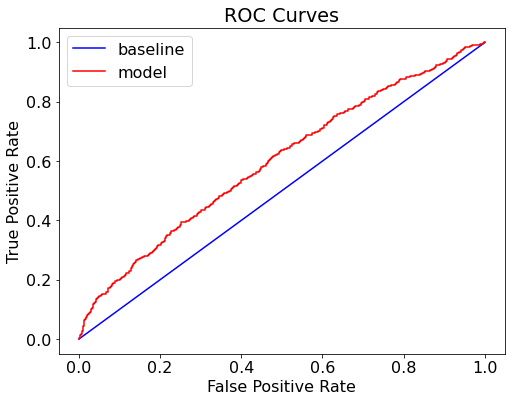

In [167]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [171]:
rf_roc_auc = roc_auc_score(test_labels, rf_probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_roc_auc)

AUC score: 0.598


In [63]:
from sklearn.tree import export_graphviz

In [68]:
estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=train.columns, max_depth = 8, 
                class_names = ['poverty', 'no poverty'], filled = True)

In [76]:
from IPython.display import Image
from subprocess import call
call('dir', shell=True)

0

In [ ]:
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

In [78]:
import joblib

In [172]:
# save the model to disk
filename = 'rf_model.sav'
joblib.dump(best_model, filename)

['rf_model.sav']

In [169]:
dt = pd.read_csv('test.csv')

In [170]:
dt = dt.select_dtypes('number')

In [83]:
dt.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,1.256981,1.256981,0.707107,1,1988,0,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,1.224745,1.224745,1.256981,2,1991,0,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,0.500000,0.500000,1.081665,2,1989,1,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,1.256981,1.256981,1.802776,2,1990,1,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,1.352775,1.352775,1.224745,1,1985,0,3.34,2007,5,3,2,0,3,0,82.32,0.0


In [173]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(dt.columns)
for col in HR_col:
    dt[col] = dt[col].astype(float)
    dt[[col]] = scaler.fit_transform(dt[[col]])
dt.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,2.155704,2.222049,1.290994,0.0,3.90625,0.00,0.040420,3.472222,0.606061,0.9375,0.384615,1.111111,0.714286,0.304348,3.073733,0.000000
1,2.100420,2.165064,2.294922,5.0,4.37500,0.00,0.043438,4.166667,0.000000,0.3125,0.384615,0.000000,0.238095,0.000000,2.224131,0.000000
2,0.857493,0.883883,1.974842,5.0,4.06250,1.25,0.045144,3.750000,0.303030,0.3125,0.384615,0.000000,0.476190,0.043478,3.248429,1.666667
3,2.155704,2.222049,3.291403,5.0,4.21875,1.25,0.000000,4.166667,0.151515,0.0000,0.769231,0.000000,0.714286,0.000000,0.640553,0.000000
4,2.319990,2.391391,2.236068,0.0,3.43750,0.00,0.043832,3.194444,0.454545,0.6250,0.384615,0.000000,0.714286,0.000000,3.002514,0.000000


In [175]:
data_test = dt.copy()

In [176]:
data_test.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,2.155704,2.222049,1.290994,0.0,3.90625,0.00,0.040420,3.472222,0.606061,0.9375,0.384615,1.111111,0.714286,0.304348,3.073733,0.000000
1,2.100420,2.165064,2.294922,5.0,4.37500,0.00,0.043438,4.166667,0.000000,0.3125,0.384615,0.000000,0.238095,0.000000,2.224131,0.000000
2,0.857493,0.883883,1.974842,5.0,4.06250,1.25,0.045144,3.750000,0.303030,0.3125,0.384615,0.000000,0.476190,0.043478,3.248429,1.666667
3,2.155704,2.222049,3.291403,5.0,4.21875,1.25,0.000000,4.166667,0.151515,0.0000,0.769231,0.000000,0.714286,0.000000,0.640553,0.000000
4,2.319990,2.391391,2.236068,0.0,3.43750,0.00,0.043832,3.194444,0.454545,0.6250,0.384615,0.000000,0.714286,0.000000,3.002514,0.000000


In [178]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.predict_proba(data_test)[:, 1]
print(result)

[0.13313512 0.19529795 0.28699552 ... 0.30829493 0.13859773 0.12387995]


In [182]:
res = pd.DataFrame(result)
res.index = data_test.index
res.columns = ['Best Performance']
res.index.name = 'index'

,Best Performance
index,
0,0.133135
1,0.195298
2,0.286996
3,0.135251
4,0.162551
...,...
5995,0.134249
5996,0.118680
5997,0.308295


In [184]:
res.to_csv('hasil5.csv')